In [42]:
from tqdm import tqdm

import numpy as np

cubes = ['hydro', 'ssd', '300G']

mus = ['02', '03', '04', '05', '06', '07', '08', '09', '10']

nap = np.zeros((3, 9, 512 * 512))

for i, cube in enumerate(cubes):
    
    for j, mu in tqdm(enumerate(mus), desc = cube):
    
        nap[i, j, :] = np.loadtxt(cube + '/tau.res.log.1.' + mu, usecols = [2])

nap = nap.reshape(3, 9, 512, 512)

np.savez('nap', nap = nap)

nap = np.load('nap.npz')['nap']

hydro: 1it [00:01,  1.33s/it]


ValueError: could not broadcast input array from shape (321) into shape (262144)

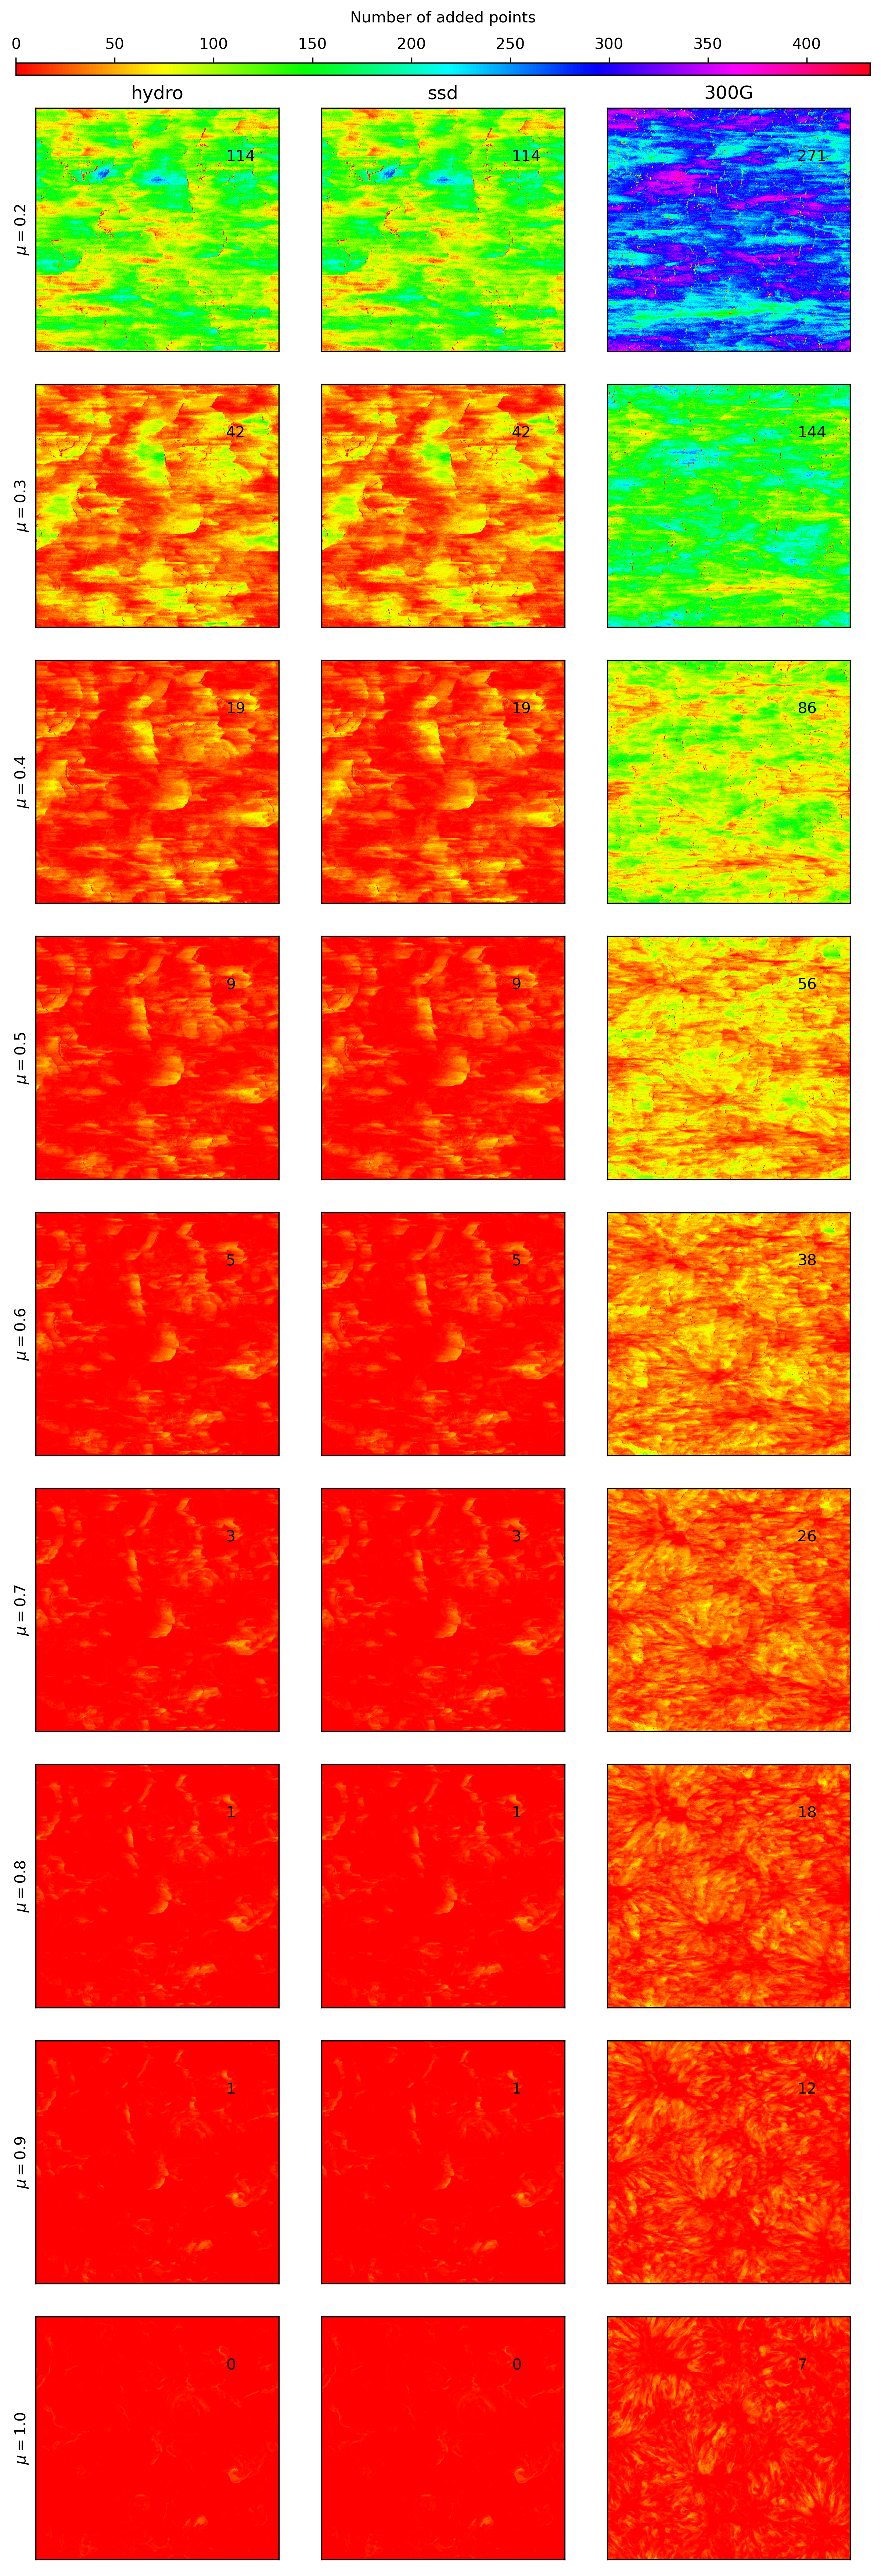

In [41]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colorbar import Colorbar

from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MultipleLocator

plt.close('all')

#fig = plt.figure(figsize = (10, 20))

fig = plt.figure(dpi = 300)

#fig.set_size_inches(8.27, 11.69, forward = True)
#fig.set_size_inches(8.27, 19.48, forward = True)
fig.set_size_inches(10, 30, forward = True)

gs = gridspec.GridSpec(10, 3, height_ratios = [0.05, 1, 1, 1, 1, 1, 1, 1, 1, 1], wspace = 0.01, hspace = 0.15)

cbar = plt.subplot(gs[0, :])

colormap = 'hsv'

nap_max = np.max(nap)

for i, cube in enumerate(cubes):
    
    for j, mu in enumerate(mus):
        
        plot = plt.subplot(gs[j + 1, i])
        
        img = plot.imshow(nap[i, j, :, :], cmap = colormap, vmin = 0, vmax = nap_max)
        
        if j == 0: plot.set_title(cube)
        if i == 0: plot.set_ylabel(r'$\mu = $' + str(int(mu) / 10))
        
        plot.set_xlim(0, 511)
        plot.set_ylim(0, 511)
        
        plot.xaxis.set_ticklabels([])
        plot.xaxis.set_ticks([])
        
        plot.yaxis.set_ticklabels([])
        plot.yaxis.set_ticks([])
        
        plot.text(400, 400, str(int(np.mean(nap[i, j, :, :]))))

cb = Colorbar(ax = cbar, mappable = img, orientation = 'horizontal', ticklocation = 'top')

cb.set_label('Number of added points', labelpad = 10)

plt.savefig('nap.pdf', bbox_inches = 'tight')

plt.show()